<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/ta_ileene_newest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [1]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 wh

In [1]:
import numpy as np

In [2]:
np.__version__

'1.24.3'

# kaggle api set up

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ileenetrinia","key":"952ebd8e75b01c8ce4e3d354d8d22cc6"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ileenetrinia/docunet-sroie-merged --unzip

Dataset URL: https://www.kaggle.com/datasets/ileenetrinia/docunet-sroie-merged
License(s): other


# Load dataset

In [6]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to image folders
sroie_folder = "/content/SROIE2019/train"
docunet_folder = "/content/DocUNet_dataset/image"

# Function to get image files from a folder
def get_images_from_folder(folder_path, valid_extensions=('.jpg', '.png', '.jpeg')):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to create a DataFrame from image files
def create_image_df(image_files):
    data = {
        'filename': [os.path.basename(f) for f in image_files],
        'filepath': image_files,
        'size': [os.path.getsize(f) for f in image_files],
        'dimensions': [Image.open(f).size for f in image_files]
    }
    return pd.DataFrame(data)

# Get image files and create DataFrames
sroie_image_files = get_images_from_folder(sroie_folder)
sroie_df = create_image_df(sroie_image_files)  # Create DataFrame for SROIE

docunet_image_files = get_images_from_folder(docunet_folder)
docunet_df = create_image_df(docunet_image_files) # Create DataFrame for DocUNet


# Now you can use head()
print("SROIE Dataset (Training Images):")
print(sroie_df.head(5))

print("\nDocUNet Dataset (Training Images):")
print(docunet_df.head(5))

SROIE Dataset (Training Images):
           filename                                       filepath     size  \
0  X51005361897.jpg  /content/SROIE2019/train/img/X51005361897.jpg   568761   
1  X51005711452.jpg  /content/SROIE2019/train/img/X51005711452.jpg   265614   
2  X51005444037.jpg  /content/SROIE2019/train/img/X51005444037.jpg   266375   
3  X51006556828.jpg  /content/SROIE2019/train/img/X51006556828.jpg   392623   
4  X51006913068.jpg  /content/SROIE2019/train/img/X51006913068.jpg  1527289   

     dimensions  
0  (2481, 3508)  
1   (920, 1929)  
2   (792, 2748)  
3   (620, 1282)  
4  (4961, 7016)  

DocUNet Dataset (Training Images):
           filename                                         filepath    size  \
0  109-959212c5.png  /content/DocUNet_dataset/image/109-959212c5.png  376030   
1   11-a0c113a9.png   /content/DocUNet_dataset/image/11-a0c113a9.png  495674   
2  109-3c47110a.png  /content/DocUNet_dataset/image/109-3c47110a.png  269462   
3  107-5a952c99.png  /conten

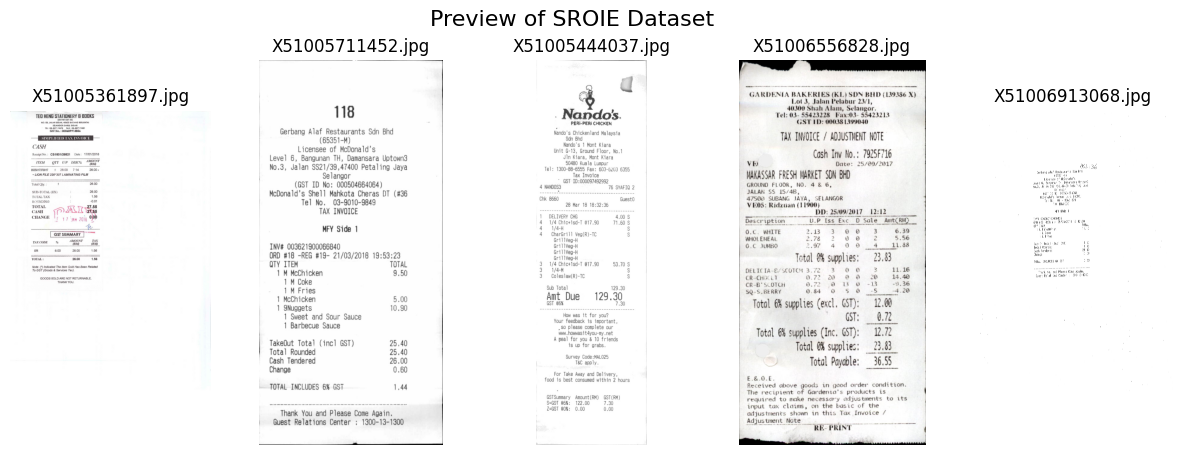

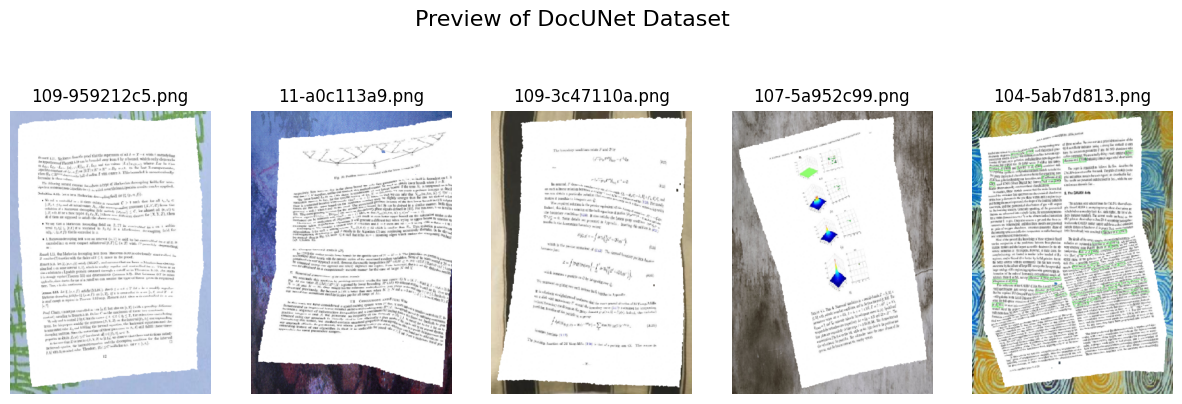

In [7]:
# Display the first 5 images from each dataset
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(df, dataset_name, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(df))):
        img_path = df['filepath'].iloc[i]
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")
    plt.suptitle(f"Preview of {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display images from SROIE dataset
display_images(sroie_df, "SROIE")

# Display images from DocUNet dataset
display_images(docunet_df, "DocUNet")


# 1. Preprocess + Save Clean SROIE

Processed 500 images
  original_filename                              original_filepath  \
0  X51005361897.jpg  /content/SROIE2019/train/img/X51005361897.jpg   
1  X51005711452.jpg  /content/SROIE2019/train/img/X51005711452.jpg   
2  X51005444037.jpg  /content/SROIE2019/train/img/X51005444037.jpg   
3  X51006556828.jpg  /content/SROIE2019/train/img/X51006556828.jpg   
4  X51006913068.jpg  /content/SROIE2019/train/img/X51006913068.jpg   

           preprocessed_filename  \
0  X51005361897_preprocessed.jpg   
1  X51005711452_preprocessed.jpg   
2  X51005444037_preprocessed.jpg   
3  X51006556828_preprocessed.jpg   
4  X51006913068_preprocessed.jpg   

                               preprocessed_filepath  
0  sroie_preprocessed_dataset/X51005361897_prepro...  
1  sroie_preprocessed_dataset/X51005711452_prepro...  
2  sroie_preprocessed_dataset/X51005444037_prepro...  
3  sroie_preprocessed_dataset/X51006556828_prepro...  
4  sroie_preprocessed_dataset/X51006913068_prepro...  


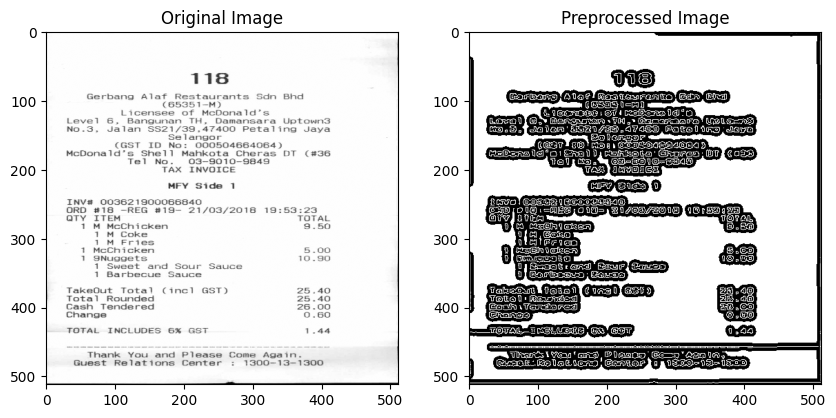

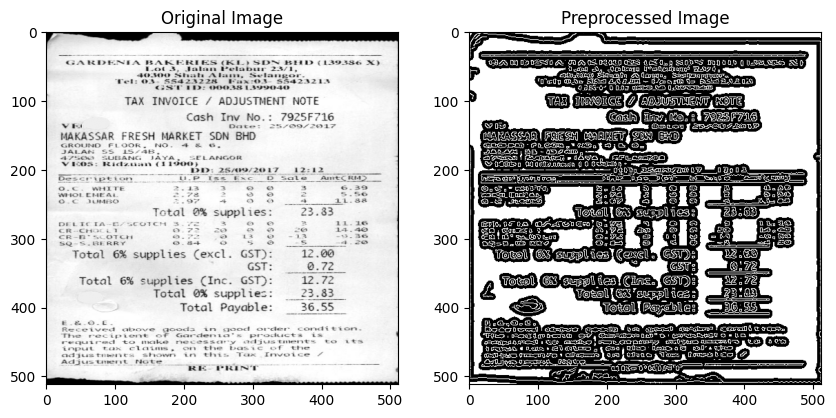

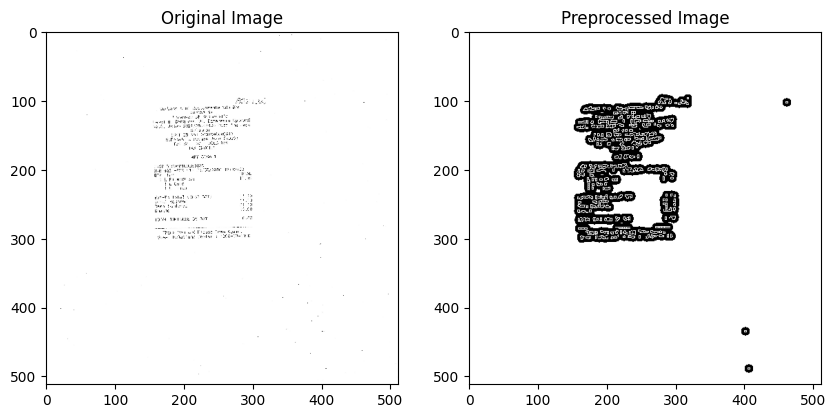

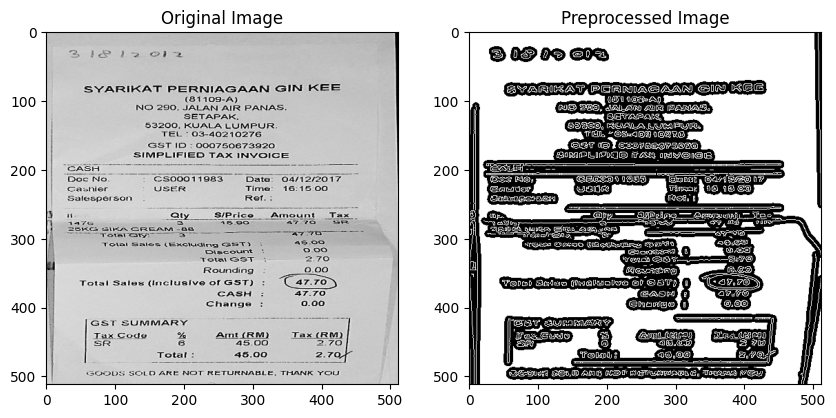

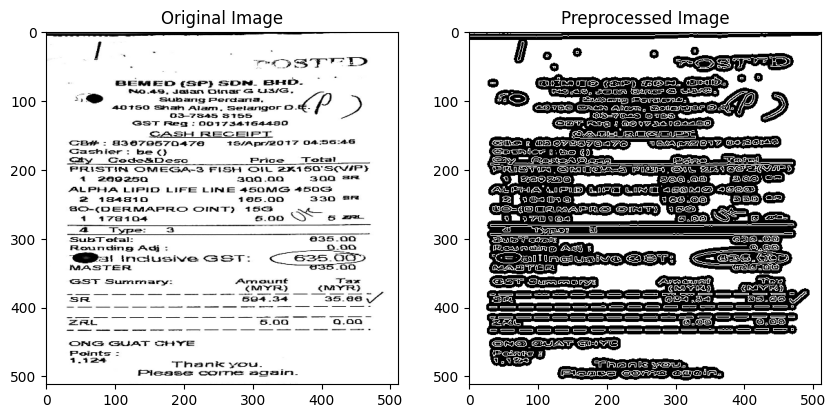

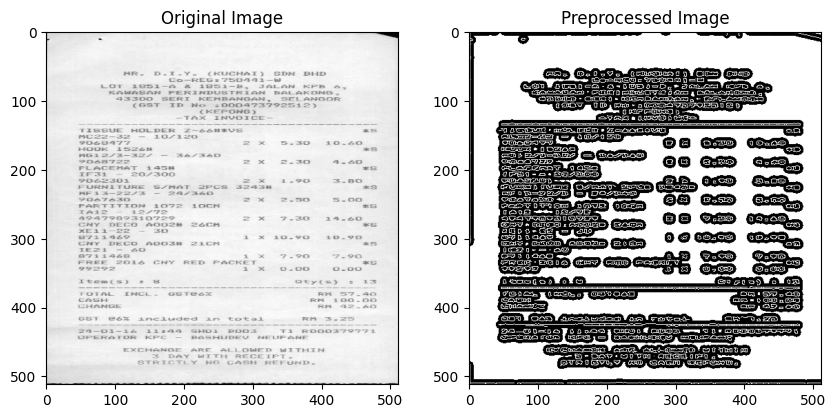

In [8]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image(image_path, save_dir):
    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512))

    # Normalize to [0, 1]
    img = img / 255.0

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(np.uint8(img * 255))
    img = img / 255.0

    # Denoising (Gaussian blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Edge Detection (Canny)
    img = cv2.Canny(np.uint8(img * 255), 50, 150)
    img = img / 255.0

    # Binarization (Adaptive Thresholding)
    img = cv2.adaptiveThreshold(np.uint8(img*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 11, 2)
    img = img / 255.0

    # Create filename based on original filename
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # Save only the final preprocessed image
    output_filename = f"{name}_preprocessed{ext}"
    cv2.imwrite(os.path.join(save_dir, output_filename), img*255)

    return img, output_filename

# Create the directory for preprocessed images
save_dir = "sroie_preprocessed_dataset"
os.makedirs(save_dir, exist_ok=True)

# Preprocess images and store information in preprocessed_df
preprocessed_data = []
for i in range(len(sroie_df)):
    image_path = sroie_df['filepath'][i]
    img, output_filename = preprocess_image(image_path, save_dir)

    preprocessed_data.append([
        sroie_df['filename'][i],
        sroie_df['filepath'][i],
        output_filename
    ])

    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1} images")

# Create the preprocessed_df DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data,
                              columns=['original_filename', 'original_filepath', 'preprocessed_filename'])
preprocessed_df['preprocessed_filepath'] = preprocessed_df['preprocessed_filename'].apply(
    lambda x: os.path.join(save_dir, x))

print(preprocessed_df.head())


for i in range(10):
    image_path = sroie_df['filepath'][i]
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))
    preprocessed_img, _ = preprocess_image(image_path, save_dir)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')

    plt.show()

In [9]:
import os
from PIL import Image

preprocessed_image_dir = "sroie_preprocessed_dataset"

# Function to get image files from a folder
def get_images_from_folder(folder_path):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files


preprocessed_images = get_images_from_folder(preprocessed_image_dir)

print(f"Number of SROIE preprocessed images: {len(preprocessed_images)}")

for image_path in preprocessed_images[:5]:  # Check the shape of the first 5 images
    try:
      img = Image.open(image_path)
      width, height = img.size
      print(f"Image: {image_path}, Shape: ({width}, {height})")
    except Exception as e:
      print(f"Error processing {image_path}: {e}")


Number of SROIE preprocessed images: 626
Image: sroie_preprocessed_dataset/X51005361895_preprocessed.jpg, Shape: (512, 512)
Image: sroie_preprocessed_dataset/X51005447833_preprocessed.jpg, Shape: (512, 512)
Image: sroie_preprocessed_dataset/X51005442338_preprocessed.jpg, Shape: (512, 512)
Image: sroie_preprocessed_dataset/X51006556818_preprocessed.jpg, Shape: (512, 512)
Image: sroie_preprocessed_dataset/X00016469612_preprocessed.jpg, Shape: (512, 512)


# 2. Distort SROIE and Save Input/Target Images

In [10]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Paths
preprocessed_dir = "/content/sroie_preprocessed_dataset"
input_dir = "/content/sroie/input"
target_dir = "/content/sroie/target"

# Create folders
os.makedirs(input_dir, exist_ok=True)
os.makedirs(target_dir, exist_ok=True)

# Apply perspective distortion
def apply_perspective_distortion(img):
    h, w = img.shape
    src = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])
    delta = 80
    dst = src + np.random.uniform(-delta, delta, src.shape).astype(np.float32)
    matrix = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(img, matrix, (w, h))

# Process each image: copy original to target, save distorted to input
for filename in tqdm(os.listdir(preprocessed_dir)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(preprocessed_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        # Save the clean image as target
        cv2.imwrite(os.path.join(target_dir, filename), img)

        # Distort and save as input
        distorted = apply_perspective_distortion(img)
        cv2.imwrite(os.path.join(input_dir, filename), distorted)


100%|██████████| 626/626 [00:05<00:00, 111.41it/s]


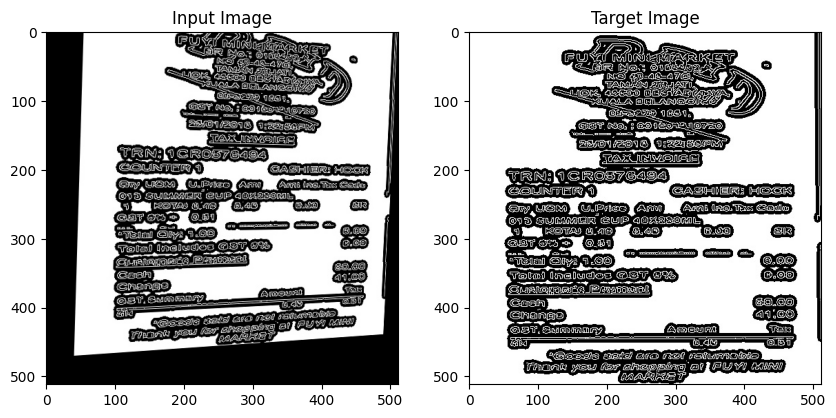

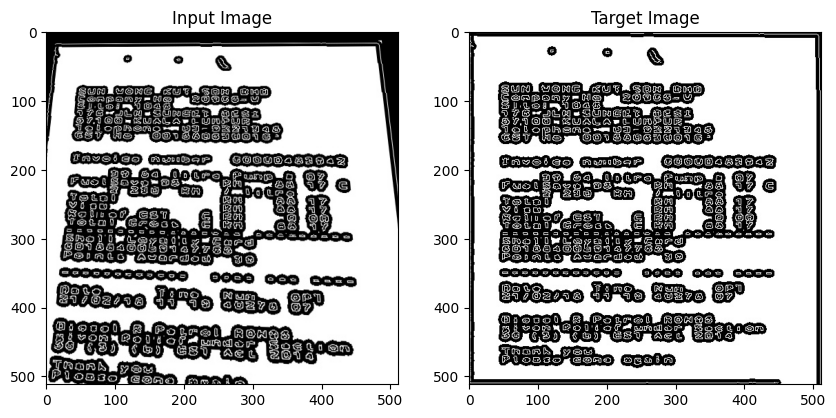

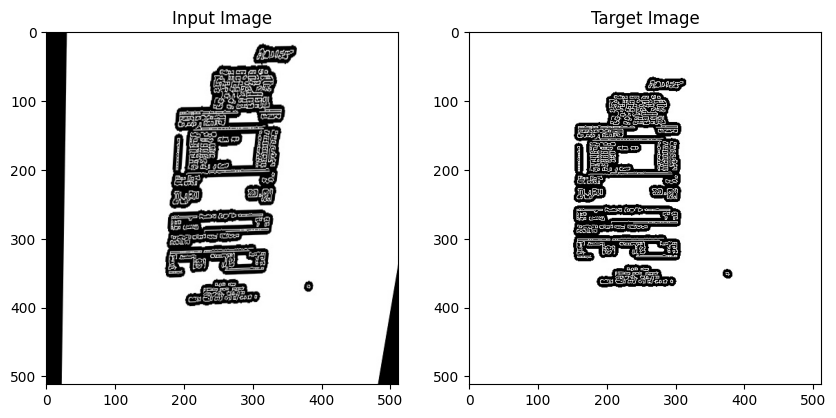

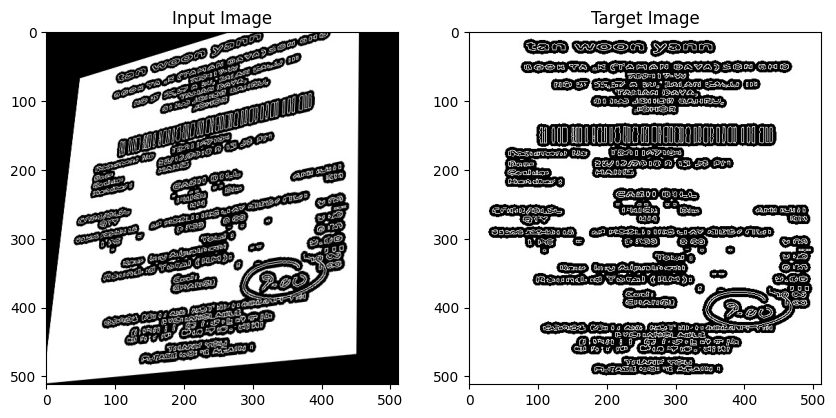

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to display images
def display_images(input_path, target_path):
    input_img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    target_img = cv2.imread(target_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(input_img, cmap='gray')
    plt.title('Input Image')

    plt.subplot(1, 2, 2)
    plt.imshow(target_img, cmap='gray')
    plt.title('Target Image')

    plt.show()

for i in range(5):
    filename = os.listdir(input_dir)[i]
    input_path = os.path.join(input_dir, filename)
    target_path = os.path.join(target_dir, filename)
    display_images(input_path, target_path)


# 3. Preprocess DocUNet for Testing

take random samples (626 images) before preprocess

Preprocessing 626 DocUNet test images: 100%|██████████| 626/626 [00:15<00:00, 39.60it/s]


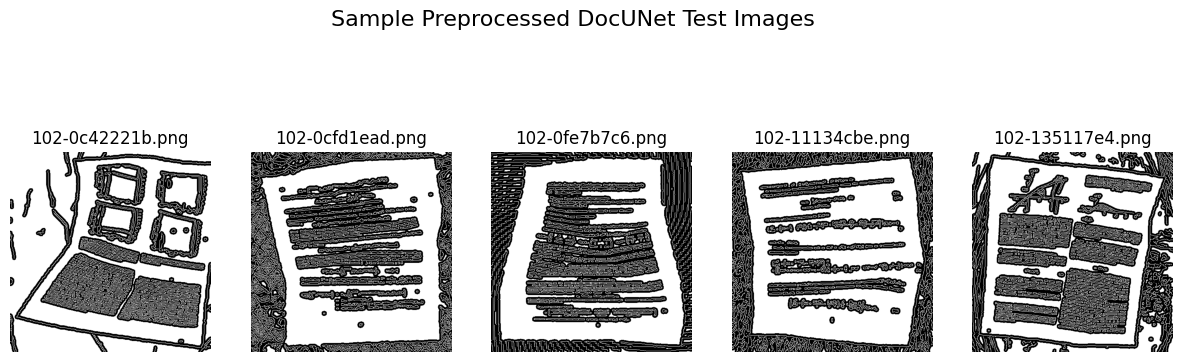

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

os.makedirs("docunet_test", exist_ok=True)

# Step 1: Sample 500 images randomly from full docunet_df
docunet_sample_df = docunet_df.sample(n=626, random_state=42).reset_index(drop=True)

# Step 2: Define preprocessing function
def preprocess_docunet(image_path, save_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    img = img / 255.0

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(np.uint8(img * 255)) / 255.0

    # Denoising
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Edge Detection
    img = cv2.Canny(np.uint8(img * 255), 50, 150) / 255.0

    # Binarization
    img = cv2.adaptiveThreshold(
        np.uint8(img * 255), 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    img = img / 255.0

    # Save as uint8 image
    cv2.imwrite(save_path, img * 255)

# Step 3: Preprocess the 500 sampled images
for _, row in tqdm(docunet_sample_df.iterrows(), total=len(docunet_sample_df), desc="Preprocessing 626 DocUNet test images"):
    input_path = row['filepath']
    output_path = os.path.join("docunet_test", row['filename'])
    preprocess_docunet(input_path, output_path)

# Step 4: Show 5 sample preprocessed images
image_files = sorted([f for f in os.listdir("docunet_test") if f.lower().endswith(('.jpg', '.png', '.jpeg'))])[:5]

plt.figure(figsize=(15, 5))
for i, filename in enumerate(image_files):
    img = cv2.imread(os.path.join("docunet_test", filename), cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
plt.suptitle("Sample Preprocessed DocUNet Test Images", fontsize=16)
plt.show()


# splitting sroie dataset

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Output structure
base_output = "/content/sroie"
splits = ['train', 'val', 'test']

for split in splits:
    os.makedirs(os.path.join(base_output, split, 'input'), exist_ok=True)
    os.makedirs(os.path.join(base_output, split, 'target'), exist_ok=True)

# Get list of filenames (assume filenames match in input & target)
filenames = sorted(os.listdir(input_dir))

# Split: 70% train, 15% val, 15% test
train_files, temp_files = train_test_split(filenames, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

# Helper to copy files
def copy_files(file_list, split):
    for fname in file_list:
        shutil.copy2(os.path.join(input_dir, fname), os.path.join(base_output, split, 'input', fname))
        shutil.copy2(os.path.join(target_dir, fname), os.path.join(base_output, split, 'target', fname))

# Copy files to each split
copy_files(train_files, 'train')
copy_files(val_files, 'val')
copy_files(test_files, 'test')

print(f"Train: {len(train_files)} images")
print(f"Val:   {len(val_files)} images")
print(f"Test:  {len(test_files)} images")

Train: 438 images
Val:   94 images
Test:  94 images


# image augmentation

In [14]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 11.2 MB/s eta 0:00:00


In [15]:
!pip install imgaug --upgrade

Copying original images to augmented dataset: 100%|██████████| 438/438 [00:00<00:00, 1347.42it/s]


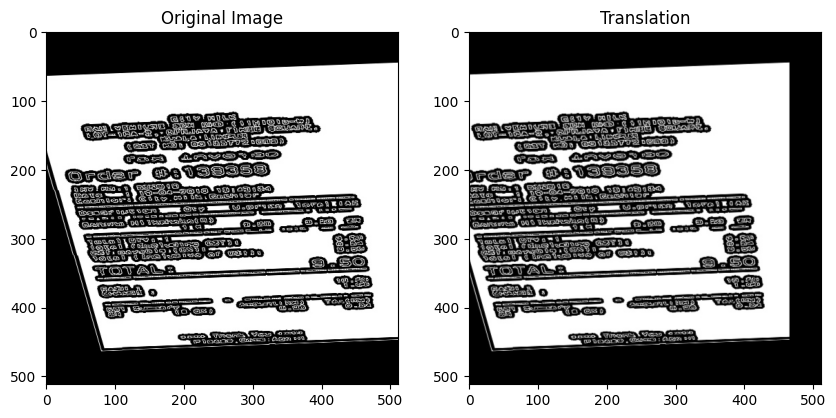

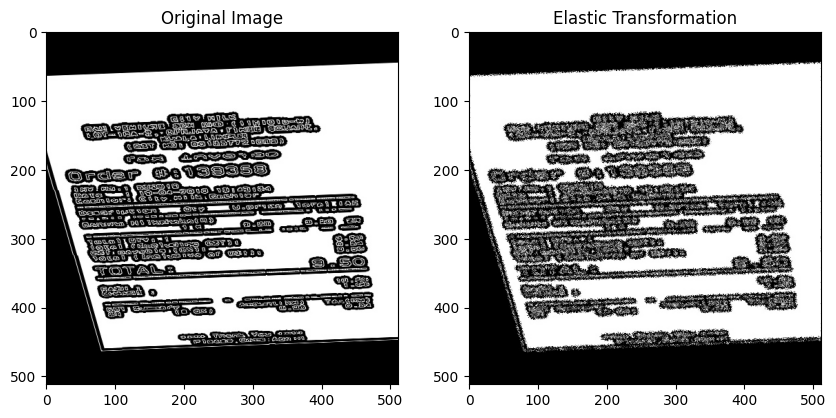

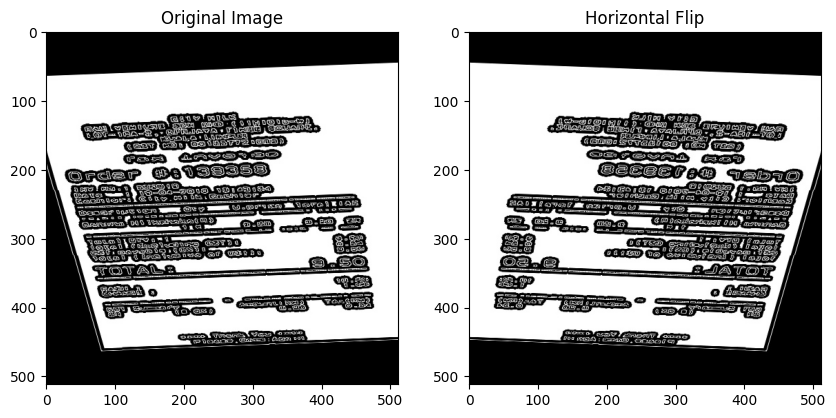

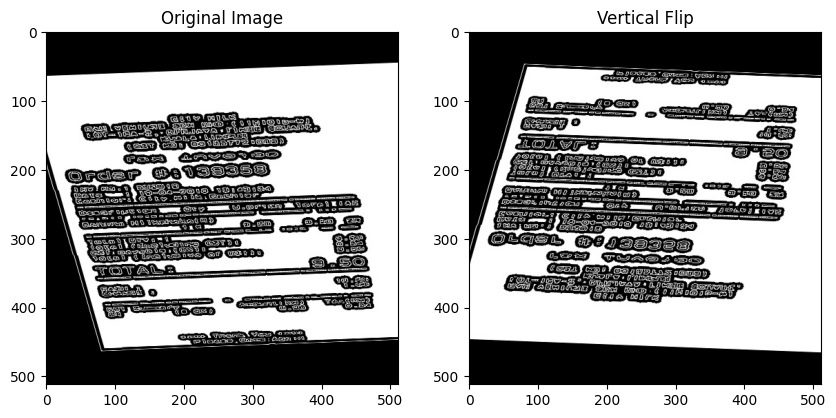

In [16]:
from imgaug import augmenters as iaa
from tqdm import tqdm
import os
import random
import shutil
import cv2
import matplotlib.pyplot as plt

# Define augmentation sequence
augmentations = [
    iaa.Affine(rotate=(-30, 30)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(1.0),
    iaa.Flipud(1.0)
]

augmentation_names = [
    "Rotation",
    "Translation",
    "Scaling",
    "Elastic Transformation",
    "Horizontal Flip",
    "Vertical Flip"
]

# Wrap as sequential augmenter
seq = iaa.Sequential(augmentations)

# Define input/output paths
sroie_train_input_dir = "/content/sroie/train/input"
sroie_train_target_dir = "/content/sroie/train/target"
aug_sroie_train_input_dir = "/content/augmented_training_dataset/input"
aug_sroie_train_target_dir = "/content/augmented_training_dataset/target"

# Make sure output folders exist
os.makedirs(aug_sroie_train_input_dir, exist_ok=True)
os.makedirs(aug_sroie_train_target_dir, exist_ok=True)

# Get image filenames
train_files = sorted(os.listdir(sroie_train_input_dir))
num_images_to_augment = len(train_files) // 2

# Augment half of the training dataset
for image_file in tqdm(random.sample(train_files, num_images_to_augment), desc="Augmenting training images"):
    try:
        input_path = os.path.join(sroie_train_input_dir, image_file)
        target_path = os.path.join(sroie_train_target_dir, image_file)

        # Read both input and target
        input_img = cv2.imread(input_path)
        target_img = cv2.imread(target_path)

        # Apply same augmentation to both
        images_aug = seq(images=[input_img, target_img])
        input_aug, target_aug = images_aug[0], images_aug[1]

        # Save augmented versions
        cv2.imwrite(os.path.join(aug_sroie_train_input_dir, f"aug_{image_file}"), input_aug)
        cv2.imwrite(os.path.join(aug_sroie_train_target_dir, f"aug_{image_file}"), target_aug)

    except Exception as e:
        print(f"Error augmenting {image_file}: {e}")

# Copy all original training images into the augmented folder too
for image_file in tqdm(train_files, desc="Copying original images to augmented dataset"):
    shutil.copy2(os.path.join(sroie_train_input_dir, image_file), os.path.join(aug_sroie_train_input_dir, image_file))
    shutil.copy2(os.path.join(sroie_train_target_dir, image_file), os.path.join(aug_sroie_train_target_dir, image_file))

# Preview each augmentation on a random image
sample_file = random.choice(train_files)
original_img = cv2.imread(os.path.join(sroie_train_input_dir, sample_file))
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

for i, augmentation in enumerate(augmentations):
    augmented_img = augmentation(image=original_img)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img)
    plt.title(augmentation_names[i])

    plt.show()


In [17]:
import os

input_count = len(os.listdir(aug_sroie_train_input_dir))
target_count = len(os.listdir(aug_sroie_train_target_dir))

print(f"Number of augmented input images: {input_count}")
print(f"Number of augmented target images: {target_count}")


Number of augmented input images: 657
Number of augmented target images: 657


# zipping buat dipindah running model

In [18]:
import shutil

# Zip each required folder
shutil.make_archive("/content/augmented_training_dataset", 'zip', "/content/augmented_training_dataset")
shutil.make_archive("/content/sroie_val", 'zip', "/content/sroie/val")
shutil.make_archive("/content/sroie_test", 'zip', "/content/sroie/test")
shutil.make_archive("/content/docunet_test", 'zip', "/content/docunet_test")

'/content/docunet_test.zip'

────୨ৎ────────୨ৎ────────୨ৎ────────୨ৎ────────୨ৎ────

# define model

In [ ]:
!pip install tensorflow==2.14.0
!pip install ml_dtypes==0.3.0 --force-reinstall --no-cache-dir
!pip install --upgrade jax
!pip install --upgrade tensorflow tensorflow-addons
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade "jaxlib[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully

In [ ]:
!pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatib

In [ ]:
import numpy as np
np.__version__

'1.26.4'

In [ ]:
import tensorflow as tf
import ml_dtypes
import cv2
import tf_keras as keras
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Multiply, Add
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import Mean

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    res1 = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(res1)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res2 = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(res2)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res3 = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(res3)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res4 = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(res4)

    # Bottleneck with attention
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, res4])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res3])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res2])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res1])
    x = Activation('relu')(x)


    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_docunet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 512, 512,  │          0 │ conv2d[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512, 512,  │          0 │ conv2d_1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 512,  │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512, 512,  │          0 │ conv2d_2[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512, 512,  │          0 │ activation[0][0], │
│                     │ 64)               │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256, 256,  │          0 │ conv2d_3[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │    147,584 │ activation_3[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 256, 256,  │          0 │ conv2d_4[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │    147,584 │ activation_4[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 256, 256,  │          0 │ conv2d_5[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256, 256,  │          0 │ activation_3[0][… │
│                     │ 128)              │            │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ add_1[0][0]     

 Total params: 16,161,218 (61.65 MB)

 Trainable params: 16,161,218 (61.65 MB)

 Non-trainable params: 0 (0.00 B)

# running model

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for the datasets
train_dir = 'augmented_training_dataset'
val_dir = 'validation_dataset'
test_dir = 'testing_dataset'

# Create subfolders ('images') if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(directory, 'images'), exist_ok=True)

# Move images to subfolders ('images')
def move_images_to_subfolder(directory):
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            source_path = os.path.join(directory, filename)
            destination_path = os.path.join(directory, 'images', filename)
            os.rename(source_path, destination_path)

move_images_to_subfolder(train_dir)
move_images_to_subfolder(val_dir)
move_images_to_subfolder(test_dir)


image_size = (512, 512)
batch_size = 8
epochs = 20
patience = 10

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


# Data generators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and testing data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

# Train the model, using the numpy_to_tensor function to convert data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 16482 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2979s 1s/step - accuracy: 0.8446 - loss: 0.1523 - val_accuracy: 0.9923 - val_loss: 0.0031
Epoch 2/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2827s 1s/step - accuracy: 0.8751 - loss: 0.0620 - val_accuracy: 0.9923 - val_loss: 0.0015
Epoch 3/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2784s 1s/step - accuracy: 0.8773 - loss: 0.0612 - val_accuracy: 0.9923 - val_loss: 0.0011
Epoch 4/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2792s 1s/step - accuracy: 0.8780 - loss: 0.0577 - val_accuracy: 0.9923 - val_loss: 7.6867e-04
Epoch 5/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2792s 1s/step - accuracy: 0.8750 - loss: 0.0585 - val_accuracy: 0.9923 - val_loss: 6.4027e-04
Epoch 6/20
 214/2061 ━━━━━━━━━━━━━━━━━━━━ 39:54 1s/step - accuracy: 0.8762 - loss: 0.0583

# eval model

In [ ]:
predictions = model.predict(test_generator)

# Calculate SSIM and PSNR for each image in the test set
ssim_scores = []
psnr_scores = []

for i in range(len(test_generator)):
    # Get the original and predicted images for the current batch
    original_images, _ = test_generator[i]
    predicted_images = predictions[i*test_generator.batch_size:(i+1)*test_generator.batch_size]

    for j in range(original_images.shape[0]):
        original_image = np.uint8(original_images[j, :, :, 0] * 255)
        predicted_image = np.uint8(predicted_images[j, :, :, 0] * 255)

        # Calculate SSIM and PSNR
        ssim_score = ssim(original_image, predicted_image, data_range=255)
        psnr_score = psnr(original_image, predicted_image, data_range=255)

        ssim_scores.append(ssim_score)
        psnr_scores.append(psnr_score)

# Print the average SSIM and PSNR scores
print(f"Average SSIM: {np.mean(ssim_scores)}")
print(f"Average PSNR: {np.mean(psnr_scores)}")


# save model

In [ ]:
model.save("ta_ileene.h5")